In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

In [2]:
# Hyper Parameters
EPOCH = 10
BATCH_SIZE = 64
LR = 0.005         # learning rate
DOWNLOAD_MNIST = False
N_TEST_IMG = 5

C:\Users\Greg\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 28, 28])


C:\Users\Greg\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


torch.Size([60000])


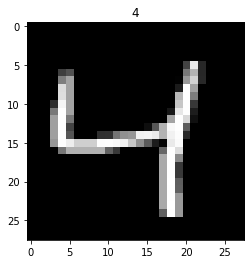

In [3]:
# Mnist digits dataset
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     # this is training data
    transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                                    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,                        # download it if you don't have it
)

# plot one example
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[2].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[2])
plt.show()

In [4]:
# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [5]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 12),
            nn.Tanh(),
            nn.Linear(12, 3),   # compress to 3 features which can be visualized in plt
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),       # compress to a range (0, 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [6]:
autoencoder = AutoEncoder()

optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
loss_func = nn.MSELoss()

Epoch:  0 | train loss: 0.2338


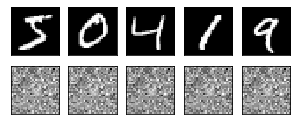

Epoch:  0 | train loss: 0.0683


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0610


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0567


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0560


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0473


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0500


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0522


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0480


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0424


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0432


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0443


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0419


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0394


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0415


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0413


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0346


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0390


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0402


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0415


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0378


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0358


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0420


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0386


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0410


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0402


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0374


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0354


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0376


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0340


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0370


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0352


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0376


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0334


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0431


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0354


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0412


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0407


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0379


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0342


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0364


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0400


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0318


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0335


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0369


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0356


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0360


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0329


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0388


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0325


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0326


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0322


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0342


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0375


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0401


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0334


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0344


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0345


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0318


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0395


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0369


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0331


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0342


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0339


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0337


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0370


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0339


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0387


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0355


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0326


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0325


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0355


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0313


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0325


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0352


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0355


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0341


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0319


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0358


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0326


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0374


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0328


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0341


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0351


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0360


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0310


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0356


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0348


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0354


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0328


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0367


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0354


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0349


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0351


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0344


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0323


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0357


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0344


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0367


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0343


<Figure size 432x288 with 0 Axes>

In [7]:
# initialize figure
f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
plt.ion()   # continuously plot

# original data (first row) for viewing
view_data = train_data.train_data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.
for i in range(N_TEST_IMG):
    a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray'); a[0][i].set_xticks(()); a[0][i].set_yticks(())
    
for epoch in range(EPOCH):
    for step, (x, b_label) in enumerate(train_loader):
        b_x = x.view(-1, 28*28)   # batch x, shape (batch, 28*28)
        b_y = x.view(-1, 28*28)   # batch y, shape (batch, 28*28)

        encoded, decoded = autoencoder(b_x)

        loss = loss_func(decoded, b_y)      # mean square error
        optimizer.zero_grad()               # clear gradients for this training step
        loss.backward()                     # backpropagation, compute gradients
        optimizer.step()                    # apply gradients

        if step % 100 == 0:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy())

            # plotting decoded image (second row)
            _, decoded_data = autoencoder(view_data)
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], (28, 28)), cmap='gray')
                a[1][i].set_xticks(()); a[1][i].set_yticks(())
            plt.draw(); plt.pause(0.05)

plt.ioff()
plt.show()

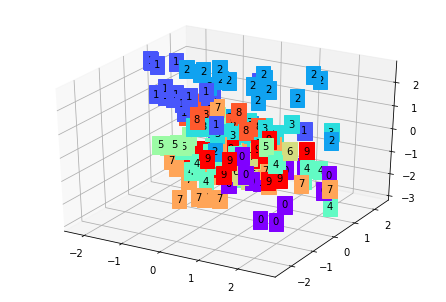

In [8]:
# visualize in 3D plot
view_data = train_data.train_data[:200].view(-1, 28*28).type(torch.FloatTensor)/255.
encoded_data, _ = autoencoder(view_data)
fig = plt.figure(2); ax = Axes3D(fig)
X, Y, Z = encoded_data.data[:, 0].numpy(), encoded_data.data[:, 1].numpy(), encoded_data.data[:, 2].numpy()
values = train_data.train_labels[:200].numpy()
for x, y, z, s in zip(X, Y, Z, values):
    c = cm.rainbow(int(255*s/9)); ax.text(x, y, z, s, backgroundcolor=c)
ax.set_xlim(X.min(), X.max()); ax.set_ylim(Y.min(), Y.max()); ax.set_zlim(Z.min(), Z.max())
plt.show()